In [86]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import matplotlib.cm 
import matplotlib.colors
from matplotlib.patches import Patch
from selenobot.embedders import AACEmbedder
from selenobot.files import FASTAFile
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import re

%load_ext autoreload
%autoreload 2

VAL_DIR = os.path.join('..', 'data', 'validation')
feature_types = ['plm', 'aac', 'len']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Evaluation on testing data

In [77]:
os.chdir('../scripts')

! python predict.py --input-path ../data/test.h5 --feature-type plm --n-classes 3
! python predict.py --input-path ../data/test.h5 --feature-type len --n-classes 3
! python predict.py --input-path ../data/test.h5 --feature-type aac --n-classes 3

! python predict.py --input-path ../data/test.h5 --feature-type plm --n-classes 2
! python predict.py --input-path ../data/test.h5 --feature-type len --n-classes 2
! python predict.py --input-path ../data/test.h5 --feature-type aac --n-classes 2

Predictions written to ../data/validation/test_predictions_ternary_model_plm.csv
Predictions written to ../data/validation/test_predictions_ternary_model_len.csv
Predictions written to ../data/validation/test_predictions_ternary_model_aac.csv
Predictions written to ../data/validation/test_predictions_binary_model_plm.csv
Predictions written to ../data/validation/test_predictions_binary_model_len.csv
Predictions written to ../data/validation/test_predictions_binary_model_aac.csv


In [82]:
test_ternary_results = dict()
test_binary_results = dict()

for feature_type in feature_types:
    ternary_results_df = pd.read_csv(os.path.join(VAL_DIR, f'test_predictions_ternary_model_{feature_type}.csv'), index_col=0, dtype={'partial':str})
    test_ternary_results[feature_type] = ternary_results_df

    binary_results_df = pd.read_csv(os.path.join(VAL_DIR, f'test_predictions_binary_model_{feature_type}.csv'), index_col=0, dtype={'partial':str})
    test_binary_results[feature_type] = binary_results_df

    print(f'{feature_type} binary model accuracy:', balanced_accuracy_score(binary_results_df.label.values, binary_results_df.prediction.values))
    print(f'{feature_type} ternary model accuracy:', balanced_accuracy_score(ternary_results_df.label.values, ternary_results_df.prediction.values), '\n')

plm binary model accuracy: 0.9925064575673432
plm ternary model accuracy: 0.8742064939677091 

aac binary model accuracy: 0.8279657307551153
aac ternary model accuracy: 0.5915938419125927 

len binary model accuracy: 0.7521376802832926
len ternary model accuracy: 0.49733831759472347 



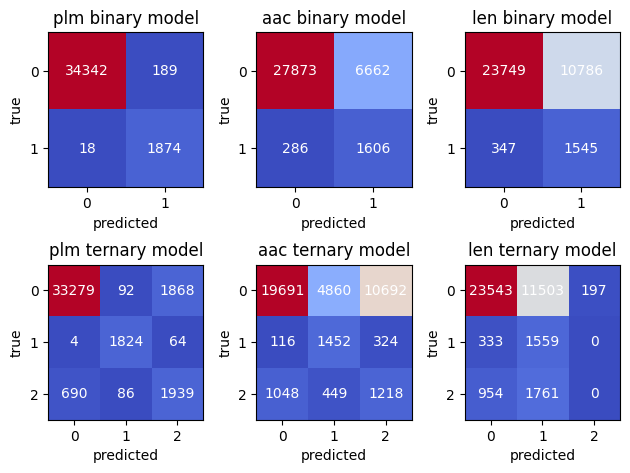

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=3)

for feature_type, ax in zip(feature_types, axes[0, :]):
    binary_results_df = test_binary_results[feature_type]
    m = confusion_matrix(binary_results_df.label.values, binary_results_df.prediction.values)
    ax.imshow(m, cmap='coolwarm')
    ax.set_yticks([0, 1])
    ax.set_xticks([0, 1])
    ax.set_title(f'{feature_type} binary model')
    ax.set_ylabel('true')
    ax.set_xlabel('predicted')

    for x in range(2):
        for y in range(2):
            text = ax.text(x, y, int(m[y, x]), ha='center', va='center', color='w')


for feature_type, ax in zip(feature_types, axes[1, :]):
    ternary_results_df = test_ternary_results[feature_type]
    m = confusion_matrix(ternary_results_df.label.values, ternary_results_df.prediction.values)
    ax.imshow(m, cmap='coolwarm')
    ax.set_title(f'{feature_type} ternary model')
    ax.set_yticks([0, 1, 2])
    ax.set_xticks([0, 1, 2])
    ax.set_ylabel('true')
    ax.set_xlabel('predicted')

    for x in range(3):
        for y in range(3):
            text = ax.text(x, y, int(m[y, x]), ha='center', va='center', color='w')

plt.tight_layout()
plt.show()

In [95]:
os.chdir('../scripts')

! python predict.py --input-path ../data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type plm --n-classes 3
! python predict.py --input-path ../data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type len --n-classes 3
! python predict.py --input-path ../data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type aac --n-classes 3

! python predict.py --input-path ../data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type plm --n-classes 2
! python predict.py --input-path ../data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type len --n-classes 2
! python predict.py --input-path ../data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type aac --n-classes 2

Predictions written to ../data/validation/bac120_proteins_r207_subset_max_length_2000_predictions_ternary_model_plm.csv
Predictions written to ../data/validation/bac120_proteins_r207_subset_max_length_2000_predictions_ternary_model_len.csv
Predictions written to ../data/validation/bac120_proteins_r207_subset_max_length_2000_predictions_ternary_model_aac.csv
Predictions written to ../data/validation/bac120_proteins_r207_subset_max_length_2000_predictions_binary_model_plm.csv
Predictions written to ../data/validation/bac120_proteins_r207_subset_max_length_2000_predictions_binary_model_len.csv
Predictions written to ../data/validation/bac120_proteins_r207_subset_max_length_2000_predictions_binary_model_aac.csv


In [97]:
feature_types = ['plm', 'aac', 'len']

# Read in the original metadata file, might be useful. 
gtdb_df = pd.read_csv(os.path.join(VAL_DIR, 'bac120_proteins_r207_subset_max_length_2000.csv'), index_col=0, dtype={'partial':str}) 

gtdb_ternary_results = dict()
gtdb_binary_results = dict()

for feature_type in feature_types:
    ternary_results_df = pd.read_csv(os.path.join(VAL_DIR, f'bac120_proteins_r207_subset_max_length_2000_predictions_ternary_model_{feature_type}.csv'), index_col=0, dtype={'partial':str})
    ternary_results_df = ternary_results_df[ternary_results_df.partial.str.match('00')]
    gtdb_ternary_results[feature_type] = ternary_results_df

    binary_results_df = pd.read_csv(os.path.join(VAL_DIR, f'bac120_proteins_r207_subset_max_length_2000_predictions_binary_model_{feature_type}.csv'), index_col=0, dtype={'partial':str})
    binary_results_df = binary_results_df[binary_results_df.partial.str.match('00')]
    gtdb_binary_results[feature_type] = binary_results_df

In [84]:
# What were the sequences predicted to be selenoproteins by the binary model predicted to be by the ternary model?
gtdb_binary_results_plm_df = gtdb_binary_results['plm']
gtdb_ternary_results_plm_df = gtdb_ternary_results['plm']

print('plm binary model - truncated selenoproteins:', (gtdb_binary_results_plm_df.prediction == 1).sum())
print('plm binary model - full-length:',(gtdb_binary_results_plm_df.prediction == 0).sum())
print()
print('plm ternary model - truncated non-selenoproteins:', (gtdb_ternary_results_plm_df.prediction == 2).sum())
print('plm ternary model - truncated selenoproteins:', (gtdb_ternary_results_plm_df.prediction == 1).sum())
print('plm ternary model - full-length:', (gtdb_ternary_results_plm_df.prediction == 0).sum())
print()

# binary_predicted_truncated_selenoproteins = gtdb_binary_results_plm_df[gtdb_binary_results_plm_df.prediction == 1].index

# for label, df in gtdb_ternary_results_plm_df[gtdb_ternary_results_plm_df.index.isin(binary_predicted_truncated_selenoproteins)].groupby('prediction'):
#     print(f'Label {label}:', len(df))

plm binary model - truncated selenoproteins: 18619
plm binary model - full-length: 442108

plm ternary model - truncated non-selenoproteins: 38525
plm ternary model - truncated selenoproteins: 13396
plm ternary model - full-length: 408806



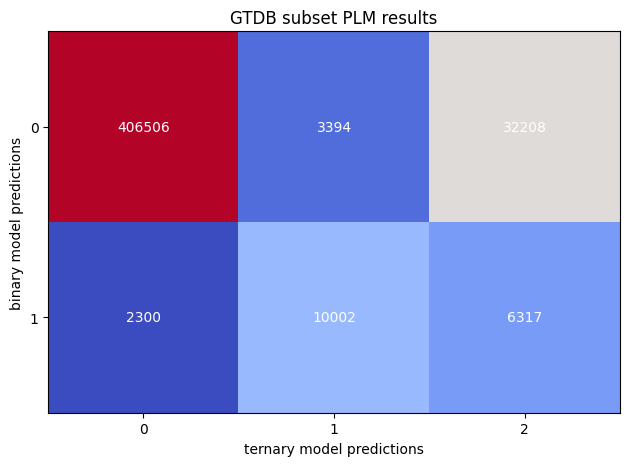

In [69]:
# print('len(gtdb_df) =', len(gtdb_df))
# print('len(gtdb_ternary_results_plm_df) =', len(gtdb_ternary_results_plm_df))
# print('len(gtdb_binary_results_plm_df) =', len(gtdb_binary_results_plm_df))

fig, ax = plt.subplots()
ax.set_yticks([0, 1]) # , labels=['fl', 'ts'])
ax.set_ylabel('binary model predictions')
ax.set_xticks([0, 1, 2]) # , labels=['fl', 'ts', 'tns'])
ax.set_xlabel('ternary model predictions')
ax.set_title('GTDB subset PLM results')

sizes = np.zeros((2, 3))
for binary_prediction, ternary_prediction in zip(gtdb_binary_results_plm_df.prediction, gtdb_ternary_results_plm_df.prediction):
    sizes[binary_prediction, ternary_prediction] += 1


ax.imshow(np.log(sizes), cmap='coolwarm') #, norm=norm)

for x in range(3):
    for y in range(2):
        text = ax.text(x, y, int(sizes[y, x]), ha='center', va='center', color='w')

plt.tight_layout()
plt.show()

# Based on the plot below, it seems as though the ternary model has a tendency to predict full-length
# sequences to be truncated non-selenoproteins. The ternary model also has the tendency to categorize truncated selenoproteins as 
# truncated non-selenoproteins. Both generally agree on the full-length sequences. 

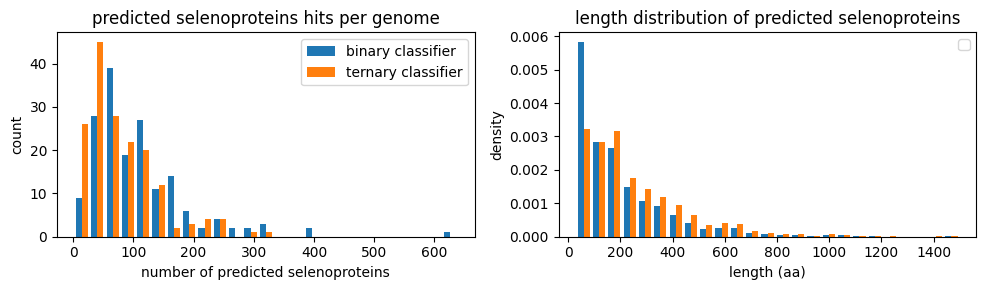

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

hits_per_genome = []
length_distribution = []
legend = []

for df in [gtdb_binary_results['plm'], gtdb_ternary_results['plm']]:
    hits_per_genome.append(df[df.prediction == 1].groupby('genome_id').apply(len, include_groups=False))
    length_distribution.append(df[df.prediction == 1].length)
    
axes[0].hist(hits_per_genome, bins=25)
axes[0].set_xlabel('number of predicted selenoproteins')
axes[0].set_ylabel('count')
axes[0].set_title('predicted selenoproteins hits per genome')
axes[0].legend(['binary classifier', 'ternary classifier'])

# length_distribution.append(gtdb_results['plm'].length) # Add the background length distribution. 
axes[1].hist(length_distribution, density=True, bins=25) # , color=['tab:blue', 'tab:orange', 'tab:green', 'gray'])

axes[1].set_xlabel('length (aa)')
axes[1].set_ylabel('density')
axes[1].set_title('length distribution of predicted selenoproteins')
axes[1].legend(legend) #  + ['background'])

plt.tight_layout()
plt.show()
# Binary classifier seems to be picking up many more of the super short sequences as truncated selenoproteins.  

In [71]:
# I am a bit curious about what signals the classifiers are picking up on, particularly the composition signals. 

features_df = pd.read_hdf(os.path.join(VAL_DIR, 'bac120_proteins_r207_subset_max_length_2000.h5'), key='aac')
features_df = features_df.rename(columns={val:key for key, val in AacEmbedder.aa_to_int_map.items()})

cols = ['prediction', 'probability_truncated_selenoprotein', 'probability_full_length']
for feature_type in feature_types:
    results_df = gtdb_results[feature_type][cols].rename(columns={col:f'{feature_type}_{col}' for col in cols})
    features_df = features_df.merge(results_df, left_index=True, right_index=True)
features_df['length'] = gtdb_df.length


In [72]:
def partial_correlation(df, variable:str=None, control_for:str=None):
    
    # https://www.reddit.com/r/rstats/comments/1bbyszo/scatterplot_for_partial_correlation/
    x = df[control_for].values.ravel()
    y = df[variable].values.ravel()
    m, b = np.polyfit(x, y, deg=1) # I think this is just linear regression... 

    # Compute the residuals... 
    residuals = y - (m * x + b)
    return residuals

7.953981597148317
6.603821730905059


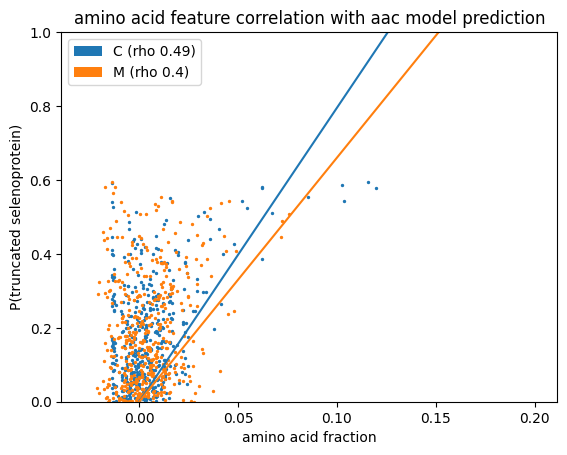

In [81]:
fig, ax = plt.subplots()

feature_type = 'aac'
legend = []
slope_threshold = 5
n = 1000

plot_x = np.linspace(0, 0.2, 25)

lines_df = []

for aa in AacEmbedder.aa_to_int_map.keys():
    if aa == 'O': # This is just full of zeros for some reason. 
        continue
    x = partial_correlation(features_df, variable=aa, control_for='length')
    y = partial_correlation(features_df, variable=f'{feature_type}_probability_truncated_selenoprotein', control_for='length')

    m, b = np.polyfit(x, y, 1)
    if abs(m) > slope_threshold:
        line = ax.plot(plot_x, plot_x * m + b)

        rho = np.round(np.corrcoef(x, y)[0, 1], 2)
        legend.append(Patch(facecolor=line[0].get_color(), label=f'{aa} (rho {rho})'))

        idxs = np.random.choice(np.arange(len(x)), n) # Only plot a subset of the points on the scatter plot. 
        ax.scatter(x[idxs], y[idxs], c=line[0].get_color(), s=2)
        print(m)
 
    lines_df.append({'aa':aa, 'm':m, 'b':b})

lines_df = pd.DataFrame(lines_df).set_index('aa')

ax.set_ylim(0, 1)
ax.set_title(f'amino acid feature correlation with {feature_type} model prediction')
ax.set_xlabel('amino acid fraction')
ax.set_ylabel('P(truncated selenoprotein)')
ax.legend(handles=legend)
plt.show()


7.87824338803195
6.388243779721526


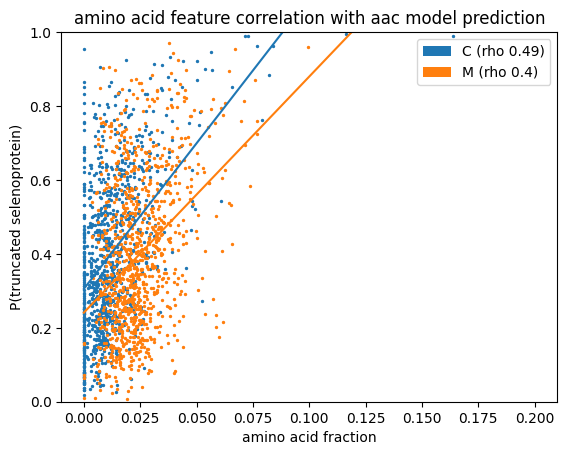

In [80]:
fig, ax = plt.subplots()

feature_type = 'aac'
legend = []
slope_threshold = 5
n = 1000

plot_x = np.linspace(0, 0.2, 25)

lines_df = []

for aa in AacEmbedder.aa_to_int_map.keys():
    if aa == 'O': # This is just full of zeros for some reason. 
        continue
    x = features_df[aa].values.ravel()
    y = features_df[f'{feature_type}_probability_truncated_selenoprotein'].values.ravel()

    m, b = np.polyfit(x, y, 1)
    if abs(m) > slope_threshold:
        line = ax.plot(plot_x, plot_x * m + b)

        rho = np.round(np.corrcoef(x, y)[0, 1], 2)
        legend.append(Patch(facecolor=line[0].get_color(), label=f'{aa} (rho {rho})'))

        idxs = np.random.choice(np.arange(len(x)), n) # Only plot a subset of the points on the scatter plot. 
        ax.scatter(x[idxs], y[idxs], c=line[0].get_color(), s=2)
        print(m)
 
    lines_df.append({'aa':aa, 'm':m, 'b':b})

lines_df = pd.DataFrame(lines_df).set_index('aa')

ax.set_ylim(0, 1)
ax.set_title(f'amino acid feature correlation with {feature_type} model prediction')
ax.set_xlabel('amino acid fraction')
ax.set_ylabel('P(truncated selenoprotein)')
ax.legend(handles=legend)
plt.show()


In [44]:
lines_df.sort_values('m')

,m,b
aa,,
D,-0.500990,0.083580
L,-0.414781,0.099491
Q,-0.344350,0.068349
Y,-0.285145,0.066216
V,-0.279452,0.077251
F,-0.223221,0.067076
I,-0.192436,0.070189
A,-0.169760,0.072050
E,-0.119102,0.065561


In [36]:
aac_embeddings[list(AacEmbedder.aa_to_int_map.keys())].values

array([[0.18333333, 0.07777778, 0.02777778, ..., 0.        , 0.00555556,
        0.07222222],
       [0.08133971, 0.11483254, 0.05741627, ..., 0.00478469, 0.02392344,
        0.05741627],
       [0.11428571, 0.08571429, 0.05714286, ..., 0.        , 0.02857143,
        0.        ],
       ...,
       [0.01595745, 0.03723404, 0.04787234, ..., 0.0212766 , 0.04787234,
        0.03723404],
       [0.04054054, 0.03716216, 0.08108108, ..., 0.00337838, 0.07432432,
        0.03716216],
       [0.10606061, 0.03030303, 0.04545455, ..., 0.03030303, 0.01515152,
        0.06060606]])